# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')    # Read in our data

## Exploratory Data Analysis (EDA)

Before we go about answering all of the questions in this assignment, it is important for us to take a look at our data and get a feel for its properties. Indeed, understanding our dataset will immensely help us save some time later when we are deciding on the critical analysis steps for answering these questions. Now that we have read the data in from the CSV file (shown above), let's see what the dataframe looks like:

In [2]:
print(df.head())
print('---------------------------------')

print(df.shape)

   temperature gender  heart_rate
0         99.3      F          68
1         98.4      F          81
2         97.8      M          73
3         99.2      F          66
4         98.0      F          73
---------------------------------
(130, 3)


Now we can see the general makeup of our dataset! There are three columns describing each measurement: the temperature (in degrees Fahrenheit), the gender, and the heartrate (in beats per minute). By looking at the shape of the dataframe, we can determine that there are 130 total measurements taken. We can now use the .describe() method for a dataframe to do some very quick statistical measurements of the data:

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Already, we can look at some interesting statistics from the data, like the mean and various quartiles. Interestingly, the mean temperature we find is only 98.2 degrees fahrenheit, but we'll look more into whether or not that's meaningful later in this exercise. Because gender is a discreet two-choice variable (M or F), it is not described here. Mainly, we just want to see quickly if there's a gender bias or not in the sample. That is, if one gender is more represented than the other. This can be accomplished by a simple count with pandas:

In [4]:
df.gender.value_counts()

M    65
F    65
dtype: int64

Great! We can see here that there are equal numbers of men and women sampled in this dataset. This helps us eliminate gender bias as a possible selection bias skewing the data. As a last test, let's check for null values in the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)

Excellent, we can see that there are no null values in the dataset! Now, we can move on to the first question: is our data normal? That is to say, does it follow a Normal Distribution? A normal distribution (also known as a Gaussian distribution and as a bell curve) is essentially described by a single peak at the mean, and symmetric exponential falloff on each side. An informal yet still informative test is graphically. Let's use numpy to compare our data with a normal distribution centered around our dataset's mean, using their Probability Density Functions (PDFs) as a comparison:

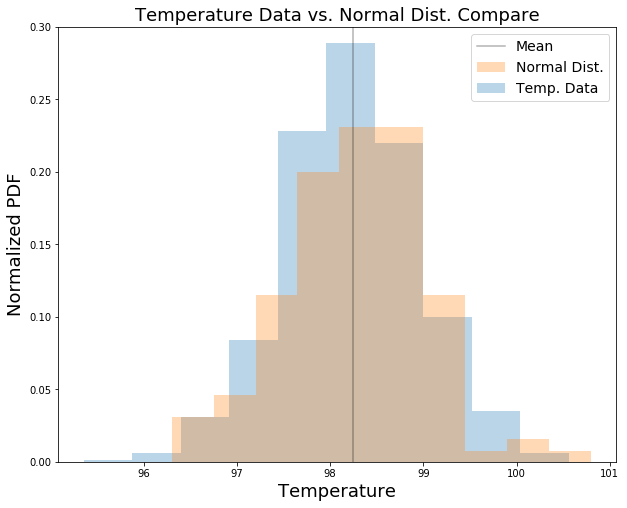

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a theoretical dataset based on a normal distribution:
norm_temp_data = np.random.normal(98.25, 0.73, size=1000)  # Use mean and std from our data

# Create histograms for comparison:
weights_temp = np.ones_like(df.temperature)/float(len(df.temperature))
weights_norm = np.ones_like(norm_temp_data)/float(len(norm_temp_data))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(norm_temp_data, bins=10, alpha=0.3, weights=weights_norm)
_ = axes.hist(df.temperature, bins=10, weights=weights_temp, alpha=0.3)
_ = axes.plot(np.array([98.25, 98.25]), np.array([0.0, 0.3]), color='black', alpha=0.3)
_ = axes.legend(['Mean', 'Normal Dist.', 'Temp. Data'], fontsize=14)
_ = axes.set_xlabel('Temperature', fontsize=18)
_ = axes.set_ylim([0.0,0.3])
_ = axes.set_ylabel('Normalized PDF', fontsize=18)
_ = plt.title('Temperature Data vs. Normal Dist. Compare', fontsize=18)
plt.show()

Well, this histogram comparison looks like it could potentially resemble a normal distribution. The only thing that could be off is a possible longer tail on the right side of the plot. The thing is, a histogram comparison is subject to binning bias -- put simply, if we change the number of bins, the comparison could look very different. A better graphical comparison might be to compare their Cumulative Distribution Functions (CDFs) rather than their PDFs.

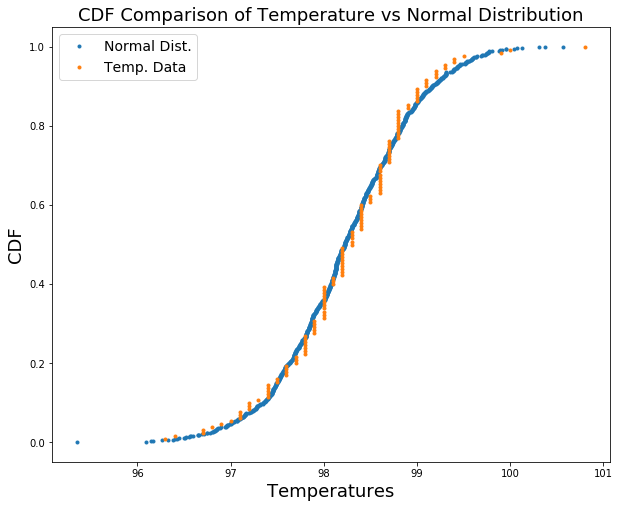

In [7]:
def cdf(data):
    """
    Computes the cumulative distribution function for your data and
    returns the x and y values. Data must be a 1-D array of values.
    
    """
    n_values = len(data)
    
    # Sort the x data, then calculate y:
    x = np.sort(data)
    y = np.arange(1, n_values+1) / n_values
    
    return x, y

# Now let's use the cdf function on both the Temp. data and or Normal dist. data:
temp_x, temp_y = cdf(df.temperature)
norm_x, norm_y = cdf(norm_temp_data)

# Plot it up!
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(norm_x, norm_y, marker='.', linestyle='none')
_ = axes.plot(temp_x, temp_y, marker='.', linestyle='none')
_ = axes.legend(['Normal Dist.', 'Temp. Data'], fontsize=14)
_ = axes.set_xlabel('Temperatures', fontsize=18)
_ = axes.set_ylabel('CDF', fontsize=18)
_ = plt.title('CDF Comparison of Temperature vs Normal Distribution', fontsize=18)
plt.show()

The beauty of this CDF comparison is that it is independent of binning, so we don't encounter the same bias. It looks pretty clear to me from this plot that the temperature data we have follows a normal distribution. It's not perfect of course, but the imperfections are symmetric and don't appear too far from the normal curve.

As such, we will say that from graphical analysis the answer to question 1 is yes, the distribution of body temperatures are normal.

## Independence of our observations

For question 2, there's really two questions being asked. First, is the dataset large? And second, are our observations independent? We'll spend more time examining the latter, but let's first consider the size of our dataset. The question seems poorly phrased, as "large" is meaningless without something to compare it to. We will assume for the sake of the assignment that the question is asking whether or not the sample is large enough to be approximated by a normal distribution (due to the central limit theorem). In other words, the central limit theorem states that given a large enough data sample, under certain (broad) conditions, the sample mean is normally distributed. From what we could find, it appears that there's no exact theoretical definition for "large enough" but that in many cases, 30 is the number of measurements required to meet this criterion. Given we have 130 independent measurements, it is reasonable to say that we have a "large" dataset under this definition.

Let's move on to the more defined question: are our observations independent? We interpret this question to be asking both if each measurement itself is correlated to the others, and also to be asking if the variables measured (in this case temperature and heart rate) are correlated with each other. The sources of the data seem to suggest there were no practices in the data collection that could cause independent measurements of a person's temperature and heart rate to be correlated with another person's measurements. Therefore, these can be assumed to be independent of each other.

The question of whether or not temperature and heart rate measurements are correlated can be answered via the Pearson correlation coefficient. This is defined as the measure of variability due to codependence compared to the independent variability of each variable. Mathematically, it is the covariance divided by the product of each variable's standard deviation. If the coefficient is close to -1 or 1, it is strongly correlated (1) or anticorrelated (-1). If it's close to zero, then there is no correlation (or a very weak one). Let's calculate it for our dataset:

In [86]:
# Calculate the covariance matrix and standard deviations:
stacked_data = np.stack((df.temperature, df.heart_rate), axis=0)
cov_matrix = np.cov(stacked_data)
covariance = cov_matrix[0,1]
var_temp = cov_matrix[0,0]
var_heart = cov_matrix[1,1]

# Calculate and print the Pearson correlation coefficient:
pearson_r = covariance / np.sqrt(var_temp * var_heart)
print(pearson_r)

0.25365640272076423


The Pearson correlation coefficient here is found to be 0.25, which is a weak positive correlation between the two measurements, and possibly representative of being correlated. Let's plot it up and see if we can get any additional intuition:

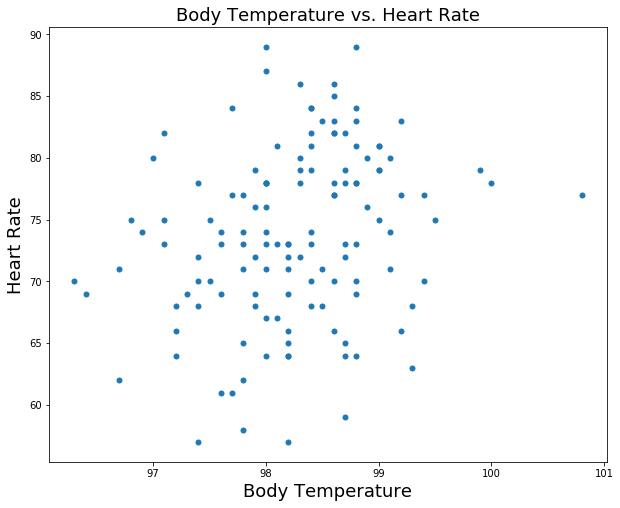

In [9]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(df.temperature, df.heart_rate, marker='.', linestyle='none', markersize=10)
_ = axes.set_xlabel('Body Temperature', fontsize=18)
_ = axes.set_ylabel('Heart Rate', fontsize=18)
_ = plt.title('Body Temperature vs. Heart Rate', fontsize=18)
plt.show()

This plot seems to illustrate that there isn't a correlation between the two observations. The datapoints are very well distributed in each part of the scatterplot. So it appears difficult to conclude anything yet, as the graphical method disagrees with the pearson correlation coefficient. We can be more quantitative here and do a hypothesis test. The null hypothesis would be that the two values are **not** correlated. We could then do a permutation test, where the pearson correlation coefficient is the test statistic:

In [90]:
def pearson_coeff(data1, data2):
    """
    Calculate the pearson correlation coefficient between
    two variables. Data1 and data2 are two arrays of values
    corresponding to each variable.
    """
    
    # Calculate the covariance matrix and standard deviations:
    stacked_data = np.stack((data1, data2), axis=0)
    cov_matrix = np.cov(stacked_data)
    covariance = cov_matrix[0,1]
    var1 = cov_matrix[0,0]
    var2 = cov_matrix[1,1]
    
    # Calculate and print the Pearson correlation coefficient:
    pearson_val = covariance / np.sqrt(var1 * var2)
    return pearson_val
    

def permutation_pearson_r(data1, data2, size=1):
    """
    Compute bootstrap replicates for the pearson correlation coefficient.
    Takes in two data arrays of same size and computes n replicates, where
    n is the number supplied in "size".
    """
    # Double check the arrays are the same:
    size1 = len(data1)
    size2 = len(data2)
    if size1 != size2:
        raise ValueError('Error: data1 and data2 must have same size.')
    
    # Initialize array for results:
    pearson = np.empty(size)
    
    # Calculate the pearson replicates
    for i in range(size):
        data1_bs = np.random.permutation(data1)
        pearson[i] = pearson_coeff(data1_bs, data2)
        
    return pearson

# Get bootstrap replicates and then compare to the empirical value:
perm_pearson_reps = permutation_pearson_r(df.temperature, df.heart_rate, size=10000)
p_val = np.sum(perm_pearson_reps >= pearson_r) / 10000
print(p_val)

0.0018


As you can see, it's really important to do a hypothesis test if you're unsure whether a correlation is true or not. Just plotting the data seemed to give the impression of no correlation, while the empirical pearson correlation coefficient suggested a weak positive correlation. It was only by doing the hypothesis test that we could truly assess the likelihood of this correlation being real or a random chance result. In this case, we found a p value of roughly 0.2%. It then seems appropriate to **soundly reject** the null hypothesis that there is no correlation between the two quantities, since when we ran the test, we found that it was very hard to reproduce the correlation value we found when we permuted our data.

## Determining the mean -- is it 98.6?

Now for the meat of the problem presented to us -- is the mean body temperature for humans actually 98.6 degrees Fahrenheit? Or is it perhaps something else? There are a number of ways to approach this problem statistically, but because question 3 wants us to begin with a bootstrap test, that's what I'll do!

Let's state a few important things for our hypothesis test. First, the null hypothesis (denoted H$_{0}$) will be that the accepted average value ($\mu$) is 98.6 degrees F. The alternative hypothesis (denoted H$_{a}$) is therefore that $\mu$ is **not** 98.6 degrees F. We will use 5% as the appropriate significance level needed to reject the null hypothesis.

Now then, to perform a bootstrap test, we will use the mean as our boostrap statistic. The mean of the observation sample is 98.25, so the question is, if the true mean is 98.6, what is the probability a sample of our size has a mean of 98.25 instead? To get at this question, we will first take our sample and shift all the values so that their mean value is 98.60 rather than 98.25:

In [10]:
temp_shift = (df.temperature - df.temperature.mean()) + 98.6

# Double-check this shift worked:
print(temp_shift.mean())

98.60000000000001


That was easy enough. Now for the actual bootstrapping. We have to essentially resample the observations with replacement a bunch of times and build up a distribution of all the possible means. This should create a roughly-normal distribution of means centered at 98.6 degrees F.

In [11]:
def bootstrap_1d(data, func):
    """
    This will take a 1d array of data and create a bootstrap replicate
    of the supplied statistical function (mean, median, std, etc.).
    
    """
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates of the supplied statistical function.
    Size here is how many total replicates you wish to draw.
    
    """

    # Initialize array of replicates to be filled:
    bs_replicates = np.empty(size)
    
    # Generate all the replicates and store them
    for i in range(size):
        bs_replicates[i] = bootstrap_1d(data, func)
    
    return bs_replicates

# Let's draw a sufficient number of bootstrap replicates of the mean:
bs_reps = draw_bs_reps(temp_shift, np.mean, size=1000)
rep_mean = np.mean(bs_reps)
print('Replicate mean: {}'.format(rep_mean))   # Check the mean of the replicates

Replicate mean: 98.60082615384617


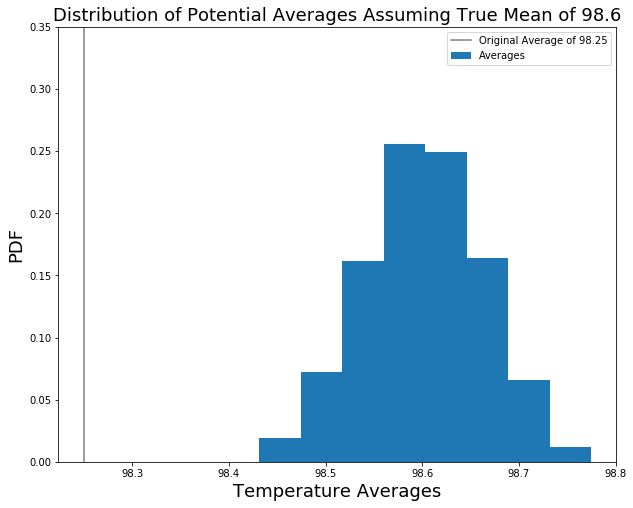

In [12]:
# Plot up the mean replicates and see the distribution:
weights_bs = np.ones_like(bs_reps)/float(len(bs_reps))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(bs_reps, bins=8, weights=weights_bs)
_ = axes.plot(np.array([98.25, 98.25]), np.array([0.0, 0.35]), color='black', alpha=0.5)
_ = axes.set_ylim([0.0, 0.35])
_ = axes.set_xlabel('Temperature Averages', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.legend(['Original Average of 98.25', 'Averages'], fontsize=10)
_ = plt.title('Distribution of Potential Averages Assuming True Mean of 98.6', fontsize=18)
plt.show()

As you can see from the above plot, the original mean of 98.25 seems very far off from the distribution of the means we calculated from bootstrapping. But can we reject the null hypothesis? We have to calculate the p-value to find out. If it is less than the desired significance percentile, then it will be sufficiently rejected:

In [13]:
unit_distance = 98.60 - 98.25
lower_vals = bs_reps[np.where(bs_reps <= (98.60 - unit_distance))]
upper_vals = bs_reps[np.where(bs_reps >= (98.60 + unit_distance))]
p_val = (np.sum(lower_vals) + np.sum(upper_vals)) / len(bs_reps)
print(p_val, len(lower_vals), len(upper_vals))

0.0 0 0


The reason the calculated p value is 0.0 is because there are no data points far enough out there -- it's essentially impossible (requires *huge* numbers of samples) to measure a mean that's 98.2 if the "true" mean of our population is 98.6. As a result, we can soundly reject the null hypothesis! Assuming the equipment was accurate and not faulty (causing an issue with the measured values), then the accepted average value for human body temperature is wrong.

This isn't the only way to test our null hypothesis. Next, let's examine frequentist statistical testing. The first thing to consider is whether to use a one sample or two sample test. For two sample tests, there are two groups being compared for a given sample, while a one sample test only considers one. The most natural thing to do here is a one sample test, because we are just measuring the average body temperature of humans. However, if we wanted to compare, say, the mean body temperature between men and women, we could use an independent two sample test, splitting the measurements by their gender. For now however, we aren't comparing, so let's stick to a one sample test.

The next question to consider is whether to use a t-test or a z-test. Generally, the main difference between the two test statistics is the sample size. If your sample size is larger than 30, then the Central Limit Theorem (as discussed previously in this notebook) says that the mean is normally distributed and the estimated standard error approximates the true standard error, even if the population is not normal. In that case, the z-test is appropriate. For smaller sample sizes, it makes sense to use the t-test, also assumes normality but is more conservative in its confidence intervals due to more variability in a smaller sample.

Our sample is 130 measurements in size, so we will use the z-test as the appropriate statistic:

In [14]:
import scipy.stats as st

# Compute the z value:
z = (98.25 - 98.60) / (np.std(df.temperature) / np.sqrt(len(df.temperature)))
print('Z value = {}'.format(z))

# Figure out the 95% confidence intervals:
print('95% confidence interval z-table range: ')
print([st.norm.ppf(.025), st.norm.ppf(.975)])

# Calculate the p-value:
p = st.norm.cdf(z)
print('p value: {}'.format(p))

Z value = -5.463916594160788
95% confidence interval z-table range: 
[-1.9599639845400545, 1.959963984540054]
p value: 2.3287121541313525e-08


The z-test here returned a value of -5.46, which is outside the 95% confidence interval of [-1.96, 1.96], so the null hypothesis should be rejected (as we found for the bootstrap test). The p-value is also incredibly low (2.33e-08), which is essentially zero, matching the previous results.

We will now do the t-test for completeness of the question, which is similar to the z-test, except we pull from the t-table rather than the z-table (i.e., pull from different distributions):

In [15]:
deg_freedom = len(df.temperature) - 1
print('t value: {}'.format(z))  # z and t values are the same, even if defined differently

# Calculate confidence interval range:
print('95% confidence interval t-table range:')
print([st.t.ppf(0.025, deg_freedom), st.t.ppf(0.975, deg_freedom)])

# Calculate p-value:
p_val = st.t.cdf(z, deg_freedom)
print('p value: {}'.format(p_val))

t value: -5.463916594160788
95% confidence interval t-table range:
[-1.9785244914586055, 1.978524491458605]
p value: 1.1562219702531183e-07


What we can see here is that for large values of n, the t-test results will start to approach that of the z-test. The reason to use the t-test for small samples is because for small values the two tables diverge and the z-test becomes inappropriate. So because n is 130 for our sample, t ~ z and so we still easily reject the null hypothesis. The p value is still essentially zero. No matter what test we use, be it a t-test, a z-test, or a bootstrap test, the null hypothesis is rejected.

For question 4, we will be testing what we stated about the differences in the t- and z-tests, that is, do they diverge at low sample size? In this case, a sample of 10 measurements:

In [16]:
# I will do this a number of times to see the results of this comparison:
z_vals = np.empty(1000)
t_vals = np.empty(1000)
p_vals_t = np.empty(1000)
p_vals_z = np.empty(1000)
avg_temps = np.empty(1000)
deg_freedom10 = 9

for i in range(1000):
    # Grab a sample of 10 random measurements
    temp_sample10 = np.random.choice(df.temperature, size=10)
    temp_mean = np.mean(temp_sample10)
    avg_temps[i] = temp_mean
    temp_std = np.std(temp_sample10)
    
    # Calculate the z and t statistics:
    t_vals[i] = (temp_mean - 98.6) / (temp_std / np.sqrt(10))
    z_vals[i] = (temp_mean - 98.6) / (np.std(df.temperature) / np.sqrt(10))
    
    # Calculate the p values:
    p_vals_t[i] = st.t.cdf(t_vals[i], deg_freedom10)
    p_vals_z[i] = st.norm.cdf(z_vals[i])

print('Mean p_val for t-test: {}'.format(np.mean(p_vals_t)))
print('Std for t-test p_vals: {}'.format(np.std(p_vals_t)))
print('Mean p_val for z-test: {}'.format(np.mean(p_vals_z)))
print('Std for z-test p_vals: {}'.format(np.std(p_vals_z)))

Mean p_val for t-test: 0.13775521656140338
Std for t-test p_vals: 0.17385984746694355
Mean p_val for z-test: 0.1400083373909873
Std for z-test p_vals: 0.17585128460878605


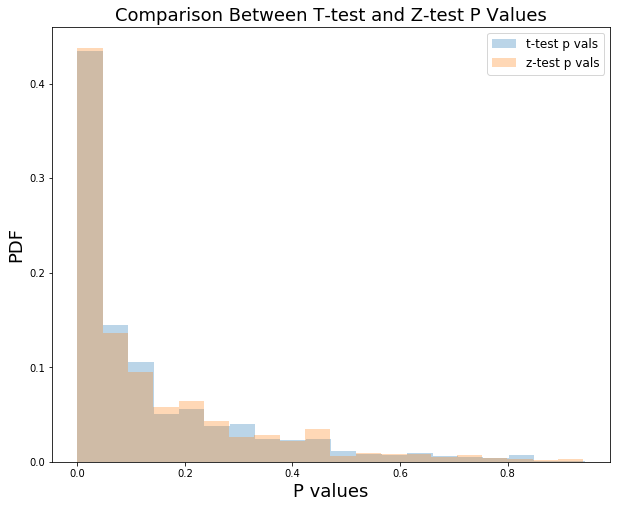

In [17]:
# Plot up the distribution of test statistics:
weights_z = np.ones_like(p_vals_z)/float(len(p_vals_z))
weights_t = np.ones_like(p_vals_t)/float(len(p_vals_t))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(p_vals_t, bins=20, weights=weights_t, alpha=0.3, label='t-test p vals')
_ = axes.hist(p_vals_z, bins=20, weights=weights_z, alpha=0.3, label='z-test p vals')
_ = axes.legend(fontsize=12)
_ = axes.set_xlabel('P values', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.title('Comparison Between T-test and Z-test P Values', fontsize=18)
plt.show()

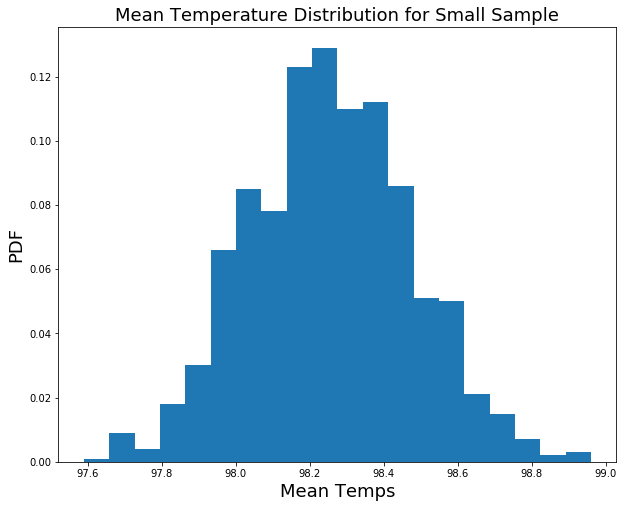

In [18]:
# Plot up the distribution of Temp averages for 10 measurement samples:
weights_temp = np.ones_like(avg_temps)/float(len(avg_temps))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(avg_temps, bins=20, weights=weights_temp)
_ = axes.set_xlabel('Mean Temps', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.title('Mean Temperature Distribution for Small Sample', fontsize=18)
plt.show()

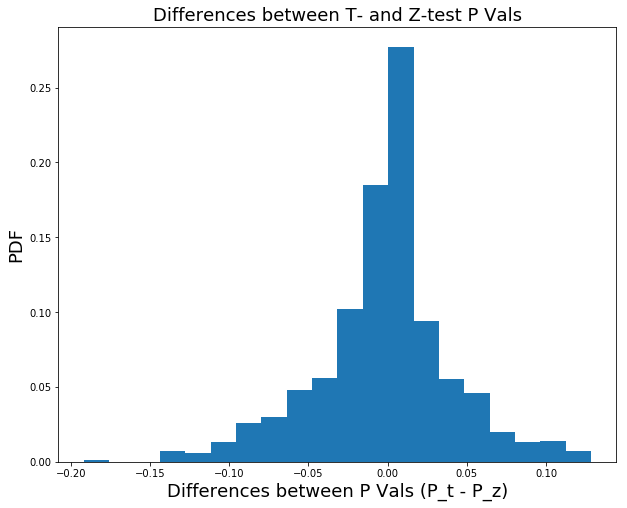

In [19]:
# See if there are differences in the test statistics:
stat_diff = p_vals_t - p_vals_z
weights_diff = np.ones_like(stat_diff)/float(len(stat_diff))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(stat_diff, bins=20, weights=weights_diff)
_ = axes.set_xlabel('Differences between P Vals (P_t - P_z)', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.title('Differences between T- and Z-test P Vals', fontsize=18)
plt.show()

In [20]:
# How many times did the z- and t-tests reject the null hypothesis?
rej_z_ind = np.where(p_vals_z <= 0.05)[0]
rej_t_ind = np.where(p_vals_t <= 0.05)[0]
rej_z = p_vals_z[rej_z_ind]
rej_t = p_vals_t[rej_t_ind]
print('The z-test rejected {}% of the time.\nThe t-test rejected {}% of the time.'.format(
      (len(rej_z)/10), (len(rej_t)/10)))

The z-test rejected 45.6% of the time.
The t-test rejected 44.5% of the time.


This analysis had led to some very interesting results. Theory suggests that the t-test is essentially a more conservative version of the z-test, allowing for better results with a smaller sample size than the z-test. In this case, we've found very little difference between the two tests for a small (n=10) sample size for our data, with both tests rejecting the Null hypothesis (p < 0.05) only about 44-45% of the time, and having a slightly higher rejection rate for the z-test. This suggests both tests have similarly weak power at a sample size of 10. So it would seem that if you have a small sample size, you have to be very careful about getting errors in your results.

Another thing that should be true is that the z- and t-tests should converge at higher sample sizes. Despite the small differences in results, individual tests occasionally had p-value differences as high as 10 or 20%, and regularly had differences at the few percent level. If we increase the sample sizes, do we find more convergence?

Let's repeat the above experiment, but instead increase the sample size slowly and see how long it takes for both tests to hit a 5% confidence level. Will it occur at the same time? How big of a sample size does it take to start converging? 

In [21]:
# Initialize arrays for storing results:
mean_pval_t = np.empty(91)
mean_pval_z = np.empty(91)
std_pval_t = np.empty(91)
std_pval_z = np.empty(91)

for sample_size in range(10,101):  # Try sample sizes from 10 - 100
    
    # Initialize arrays for individual run results:
    z_vals = np.empty(1000)
    t_vals = np.empty(1000)
    p_vals_t = np.empty(1000)
    p_vals_z = np.empty(1000)
    avg_temps = np.empty(1000)
    deg_freedom_sample = sample_size - 1
    
    # Complete individual runs, 1000 for each sample size from 10-100
    for i in range(1000):
        # Grab a sample of random measurements
        temp_sample_run = np.random.choice(df.temperature, size=sample_size)
        temp_mean = np.mean(temp_sample_run)
        avg_temps[i] = temp_mean
        temp_std = np.std(temp_sample_run)
    
        # Calculate the z and t statistics:
        t_vals[i] = (temp_mean - 98.6) / (temp_std / np.sqrt(sample_size))
        z_vals[i] = (temp_mean - 98.6) / (np.std(df.temperature) / np.sqrt(sample_size))
    
        # Calculate the p values:
        p_vals_t[i] = st.t.cdf(t_vals[i], deg_freedom_sample)
        p_vals_z[i] = st.norm.cdf(z_vals[i])
    
    # Store the means and standard devs. of each run:
    mean_pval_t[sample_size-10] = np.mean(p_vals_t)
    std_pval_t[sample_size-10] = np.std(p_vals_t)
    mean_pval_z[sample_size-10] = np.mean(p_vals_z)
    std_pval_z[sample_size-10] = np.std(p_vals_z)

In [54]:
# At what sample size do both t- and z-tests first give a p value of 5% or less:
sample_size_arr = np.arange(91) + 10
five_perc_ind = np.where(np.logical_and(mean_pval_t <= 0.05, mean_pval_z <= 0.05))[0][0]
one_perc_ind = np.where(np.logical_and(mean_pval_t <= 0.01, mean_pval_z <= 0.01))[0][0]
print(sample_size_arr[five_perc_ind], sample_size_arr[one_perc_ind])

24 47


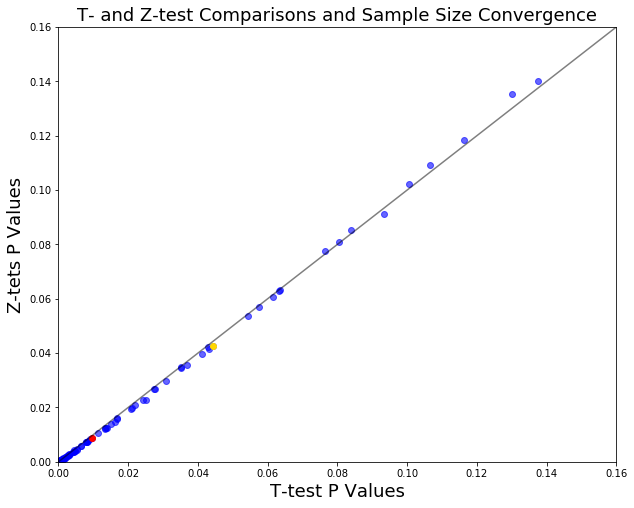

In [95]:
# Now let's plot up the results: how much do the p_vals differ?

# Start the figure:
fig, axes = plt.subplots(figsize=(10,8))

# Make the initial plots:
unity_xy = np.linspace(0,1,1000)
_ = axes.plot(mean_pval_t, mean_pval_z, marker='.', linestyle='none', alpha=0.6, c='blue', markersize=12)
_ = axes.plot(mean_pval_t[five_perc_ind], mean_pval_z[five_perc_ind], marker='.', 
              linestyle='none', c='gold', markersize=12)
_ = axes.plot(mean_pval_t[one_perc_ind], mean_pval_z[one_perc_ind], marker='.', 
              linestyle='none', c='red', markersize=12)
_ = axes.plot(unity_xy, unity_xy, color='black', alpha=0.5)

# Wanted to change colors based on sample size and make a colorbar...couldn't make it work so abandoned.
# Oh well...

# Set labels and show the plot:
_ = axes.set_xlabel('T-test P Values', fontsize=18)
_ = axes.set_ylabel('Z-tets P Values', fontsize=18)
_ = axes.set_xlim([0,0.16])
_ = axes.set_ylim([0.0, 0.16])
_ = plt.title('T- and Z-test Comparisons and Sample Size Convergence', fontsize=18)
plt.show()

As you can see from the above plot and results, the z- and t-tests track pretty well from a sample size of 10 all the way to a sample size of 100. The gold point is where they first begin having a p value <= 0.05, which is the sample size of 24. This is approximately at the recommended sample size of 30. The red point is where both tests give a p value <= 0.01, which is the sample size of 47.

Interestingly, at the lower sample sizes I found the average p values for the z-test were mostly higher than those of the t-test, until the values started to drop below 0.08, when it switched to being lower than the t-test values. These differences however were mostly pretty slim. Let's see if there were any differences between the p value standard deviations:

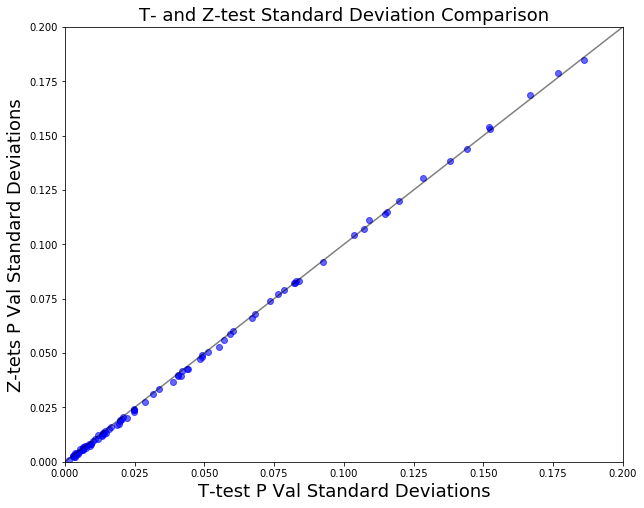

In [59]:
fig, axes = plt.subplots(figsize=(10,8))

unity_xy = np.linspace(0,1,1000)
_ = axes.plot(std_pval_t, std_pval_z, marker='.', linestyle='none', alpha=0.6, c='blue', markersize=12)
_ = axes.plot(unity_xy, unity_xy, color='black', alpha=0.5)

# Set labels and show the plot:
_ = axes.set_xlabel('T-test P Val Standard Deviations', fontsize=18)
_ = axes.set_ylabel('Z-tets P Val Standard Deviations', fontsize=18)
_ = axes.set_xlim([0,0.2])
_ = axes.set_ylim([0.0, 0.2])
_ = plt.title('T- and Z-test Standard Deviation Comparison', fontsize=18)
plt.show()

Looking at this plot, we can tell two things. First, the standard deviation in the p value distributions are similar for both tests, staying as close to unity or closer to unity than the means did. Second, there are many more sample sizes with small deviations than large ones, which likely belong to the larger sample sizes. We can test this briefly by just looking at the ends of the STD distribution:

In [62]:
print(std_pval_t[0:15])
print(std_pval_t[-15:])
print(std_pval_z[0:15])
print(std_pval_z[-15:])

[0.18608891 0.17691584 0.16674628 0.15195148 0.15229998 0.14418077
 0.12841791 0.11977995 0.13798589 0.10898366 0.11538724 0.11471077
 0.10378736 0.10720517 0.0826683 ]
[0.00638579 0.00383686 0.00403832 0.00603682 0.0048185  0.00347295
 0.00282551 0.00648435 0.00649824 0.00314425 0.00725119 0.00301437
 0.00330043 0.00158767 0.00433344]
[0.18498243 0.17861013 0.16884881 0.15386164 0.15327776 0.14404987
 0.13033165 0.12007238 0.13842352 0.11124044 0.11510161 0.11396405
 0.10448504 0.10687896 0.08230531]
[0.0061476  0.00318798 0.00379293 0.0053411  0.00362206 0.00203113
 0.0028497  0.00589508 0.00679759 0.00323019 0.00739069 0.00265607
 0.00229004 0.00105263 0.00395481]


As this confirms, the larger your sample size, you get a lower p value, and the standard deviation of the p values gets much lower, implying that the tests' power increases, as your answer becomes more consistent.

This suggests that both tests are reliable at larger sample sizes, and that they are unreliable at small sample sizes. This is surprising to me given that the t-test is supposed to be better with small sample size, but in reality, it's not much different. Technically speaking, you usually can't use the z-test at small sample size because it required the "true" standard deviation of your population, and at a small sample size you don't know what that value is, whereas with a large sample size, the sample standard deviation approximates the true value very well and the z-test becomes valid. So it would appear the main reason for using the t-test at small sample size isn't as much for reliability/accuracy, but rather because it's the only test of the two that you can do with validity (unless you somehow knew the true standard deviation before carrying out your experiment, which seems very unlikely).

## Temperature Abnormality

Now let's consider what temperatures are considered "normal" for an individual, subsequently labeling temperatures outside that range to be "abnormal." Since we were able to show early in this analysis that the distribution can be considered normal, we can use a normal distribution to get 95% intervals for the population, and temperatures outside that range would be considered abnormal. What should we use for the mean and standard deviation? Let's create a bunch of bootstrap samples and get the average mean and average standard deviation:

In [65]:
# We can use the draw_bs_reps() function defined above to get bootstrap reps of the mean and std:
means = draw_bs_reps(df.temperature, np.mean, size=10000)
stds = draw_bs_reps(df.temperature, np.std, size=10000)
true_mean = np.mean(means)
true_std = np.mean(stds)
print(true_mean, true_std)
print(np.mean(df.temperature), np.std(df.temperature))

98.24777869230769 0.7251934640374298
98.24923076923075 0.7303577789074656


As is shown by the above results, the bootstrap method doesn't produce drastically different results than the mean and std of the original sample, mainly because our sample is large enough to give us an accurate normal distribution. So let's compute confidence intervals using the bootstrapped values:

In [66]:
normal_dist = np.random.normal(98.248, 0.725, size=100000)
conf_ints = np.percentile(normal_dist, [0.25, 97.5])
print(conf_ints)

[96.18749467 99.67520837]


According to our calculations, a temperature should be considered abnormal (likely due to illness) if the temperature is below 96.2 degrees or above 99.7 degrees Fahrenheit. Do these results differ if you use the z- and t-tests? For the z-test, a 95% confidence interval is [-1.96, 1.96], while for a t-test it's [-1.98, 1.98]:

In [69]:
def stat_test_95int(mu, std, n):
    high_val_z = (1.96 * std / np.sqrt(n)) + mu
    low_val_z = (-1.96 * std / np.sqrt(n)) + mu
    high_val_t = (1.98 * std / np.sqrt(n)) + mu
    low_val_t = (-1.98 * std / np.sqrt(n)) + mu
    return [low_val_z, high_val_z, low_val_t, high_val_t]

intervals = stat_test_95int(np.mean(df.temperature), np.std(df.temperature), 1)
print(intervals)

[96.81772952257212, 99.68073201588938, 96.80312236699396, 99.69533917146754]


The frequentist tests give similar results to the bootstrap method, giving slightly smaller of a range for the 95% confidence intervals. The z-test gave an interval of 96.82 to 99.68 degrees Fahrenheit, while the t-test gave an interval of 96.80 to 99.70 degrees Fahrenheit. This makes sense given that the t-test is slightly more conservative than the z-test is.

## Are there differences in mean body temperature for men and women?

Now for the final question for us to examine in this notebook. So far, we've thoroughly examined our data to discover a number of things about human body temperature, but we've completely ignored one column of our data: gender. So now we can split our sample into two 65-person samples (since each gender was evenly sampled) and compare statistics for each group. First, some quick EDA to see how the samples differ:

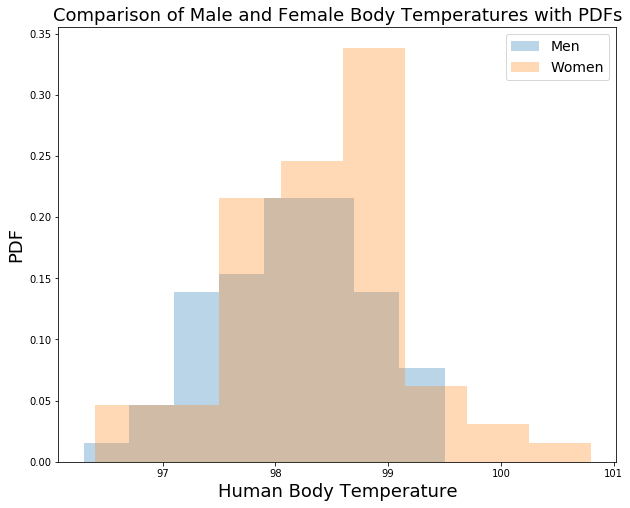

In [77]:
# Separate the dataframe by gender:
men_df = df.loc[df.gender=='M']
women_df = df.loc[df.gender=='F']

# Make histograms of the gendered data:
weights_men = np.ones_like(men_df.temperature)/float(len(men_df.temperature))
weights_women = np.ones_like(women_df.temperature)/float(len(women_df.temperature))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(men_df.temperature, bins=8, weights=weights_men, alpha=0.3, label='Men')
_ = axes.hist(women_df.temperature, bins=8, weights=weights_women, alpha=0.3, label='Women')
_ = axes.legend(fontsize=14)
_ = axes.set_xlabel('Human Body Temperature', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.title('Comparison of Male and Female Body Temperatures with PDFs', fontsize=18)
plt.show()

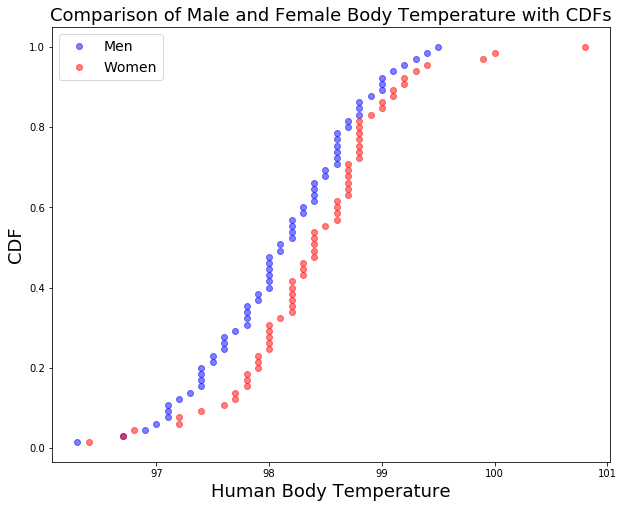

In [79]:
# Calculate the CDFs for each distribution:
men_x, men_y = cdf(men_df.temperature)
women_x, women_y = cdf(women_df.temperature)

# Plot the CDFs:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(men_x, men_y, marker='.', linestyle='none', alpha=0.5, color='blue', markersize=12, label='Men')
_ = axes.plot(women_x, women_y, marker='.', linestyle='none', alpha=0.5, color='red', markersize=12, label='Women')
_ = axes.legend(fontsize=14)
_ = axes.set_xlabel('Human Body Temperature', fontsize=18)
_ = axes.set_ylabel('CDF', fontsize=18)
_ = plt.title('Comparison of Male and Female Body Temperature with CDFs', fontsize=18)
plt.show()

Some basic EDA beautifully illustrates something interesting: the women sampled in our data seem to have higher body temperatures on average than the men do. This is definitely worth quantifying. To do this, we'll perform a Two Sample Bootstrap Hypothesis Test in order to test if these are fundamentally different samples.

The Null Hypothesis for this experiment is that the mean of male human body temperatures is the same as the mean of female human body temperatures. Thus, our alternate hypothesis is that they are different. To simulate this, we will use the difference of means as our test statistic. Then, we will shift the data to have the same mean...a good choice is the mean for all of our data, or 98.25 degrees Fahrenheit. From there, we can generate bootstrap replicates of the differences in the mean, and calculate the p value.

In [81]:
# Calculate the true mean difference of our data:
empirical_mean_diff = np.mean(women_df.temperature) - np.mean(men_df.temperature)
print(empirical_mean_diff)

# Shift both distributions such that they have the same mean:
men_shift = men_df.temperature - np.mean(men_df.temperature) + 98.25
women_shift = women_df.temperature - np.mean(women_df.temperature) + 98.25

# Calculate bootstrap replicates of the mean for each distribution, then take the difference:
bs_reps_men = draw_bs_reps(men_shift, np.mean, size=10000)
bs_reps_women = draw_bs_reps(women_shift, np.mean, size=10000)
bs_mean_diffs = bs_reps_women - bs_reps_men   # for comparison with the empirical value

# Calculate the p value:
p_val = np.sum(bs_mean_diffs >= empirical_mean_diff) / 10000
print(p_val)

0.2892307692307696
0.0102


As you can see here, the mean difference in our empirical data is 0.289 degrees Fahrenheit, and the p value for our hypothesis test is approximately 1%. This means that under the assumption that the null hypothesis is true (that they both share the same mean), you get a mean difference as high as the one we observed only 1% of the time. This is a statistically significant rejection of the null hypothesis. As such, we can statistically state here that there is a difference between male and female populations with regards to human body temperature. Women seem to have a higher average body temperature than men do.

## Conclusions

This has been a very interesting dive into the nature of human body temperature. First, we were able to distinguish that the population of human body temperature is normally distributed and that the sample is large enough for statistical testing. We then explored if our sample was independently observed and found that there is a weak, positive correlation between human body temperature and their heart rate.

After that, we dug into the meat of the problem -- is the mean body temperature actually 98.6? To explore this, we used three tests, a bootstrap test, a z-test, and a t-test, and in each case, found that it is not the true mean with very high statistical significance. We then explored if the answer could be obtained with a small sample size, as well as to compare the z- and t-tests. We found that it's much harder to get to the answer if you have a small sample size, and that it only converged on a statistically significant result at around 24 observations (testing between 10 and 100). We also found that both frequentist tests were very similar, even at low sample sizes, and converged more closely as the sample size increased.

We then asked what temperatures would be considered abnormal by figuring out 95% confidence intervals. In each case, we determined that the range is approximately 96.2 to 99.7 degrees Fahrenheit, with the low end varying more between different statistical tests (between 96.2 and 96.8 degrees Fahrenheit). Lastly, we tested whether or not there is a gender difference using the bootstrap hypothesis test. We did this because the test is an easy to implement and very flexible statistical test, and found that women have a higher mean temperature than men with a confidence level of 99%, which is statistically significant.

In short, our conclusions are as follows:
1. The population of human body temperature is approximated well by a normal distribution.
2. There is a weak, positive correlation between body temperature and heart rate.
3. The average human body temperature is not 98.6 degrees Fahrenheit to very large significance.
4. Z- and t-tests are very similar and both do not work accurately at low sample size.
5. The range of "normal" body temperatures is approximately 96.2 to 99.7 degrees Fahrenheit (95% conf. level).
6. Women have a higher mean temperature than men to a 99% confidence level.